In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline


In [5]:
os.getcwd()

'/Users/mahtablashgari/Desktop/proj-python/DataScience-roadmap'

In [6]:
ls

Classified Data.txt                 Untitled3.ipynb
DataSci.4                           Untitled4.ipynb
DataSci.5                           Untitled5.ipynb
DataSci.5_missvalu                  Untitled6.ipynb
DataSci6-9-LogReg.ipynb             dataSci-1.ipynb
DataSci_5.ipynb                     dataSci-2.ipynb
DataSci_6-logisticRegression.ipynb  dataSci-3-1.py
DataSci_preprozess.ipynb            dataSci-3.ipynb
DataSciwrangling.ipynb              dataSci4.py
Data_Wrangling/                     data_falcon9.csv
Datasci-data_wrangling.ipynb        dataset_falcon9.csv
USA_Housing.csv                     knn.ipynb
Untitled.ipynb                      missing_dataset_falcon9.xlsx
Untitled1.ipynb                     preprozess_data.csv
Untitled2.ipynb


In [7]:
df = pd.read_csv("Classified Data.txt",index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler= StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [12]:
scaler_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
df_feature=pd.DataFrame(scaler_features, columns=df.columns[:-1])
df_feature.head(4)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test=train_test_split(scaler_features, df['TARGET CLASS'], test_size=0.3)

In [16]:
#using KNN model
#we are trying to come up with a model to predict whether someone will target calls or not. i start wit K=1

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn= KNeighborsClassifier(n_neighbors=1)

In [19]:
knn=KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred= knn.predict(X_test)

In [22]:
#Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))

[[135  22]
 [ 15 128]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       157
           1       0.85      0.90      0.87       143

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [26]:
#elbow Method

In [27]:
error_rate= []
# will take some time
for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [29]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Error Rate')

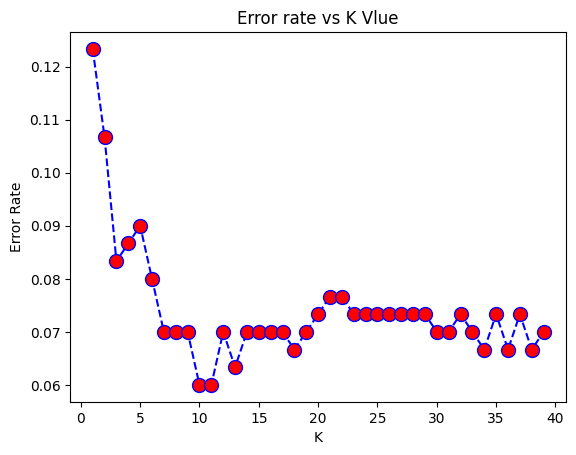

In [34]:
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor= 'red', markersize=10)
plt.title('Error rate vs K Vlue')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#now with k=10

In [36]:
knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
pred=knn.predict(X_test)

print('with K=10')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

with K=10
[[147  10]
 [  8 135]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       157
           1       0.93      0.94      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

